In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [5]:
# Define dataset path (update this based on your system)
DATASET_PATH = "./minet"  # Change this to the actual path

# Image parameters
IMG_SIZE = (128, 128)  # Resize images to 128x128
BATCH_SIZE = 32


In [8]:
# Load dataset using ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  # 80-20 train-validation split

train_generator = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training"
)

val_generator = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation"
)

# Get number of classes
num_classes = len(train_generator.class_indices)


Found 768 images belonging to 7 classes.
Found 189 images belonging to 7 classes.


In [9]:
def build_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation="relu", input_shape=input_shape),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation="relu"),
        MaxPooling2D(2, 2),
        Conv2D(128, (3, 3), activation="relu"),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(128, activation="relu"),
        Dropout(0.5),
        Dense(num_classes, activation="softmax")  # Output layer with softmax activation
    ])
    return model

# Create model
model = build_model((IMG_SIZE[0], IMG_SIZE[1], 3), num_classes)


In [10]:
model.compile(optimizer=Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])


In [11]:
history = model.fit(train_generator, validation_data=val_generator, epochs=10)


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 321ms/step - accuracy: 0.1993 - loss: 1.9234 - val_accuracy: 0.4392 - val_loss: 1.4441
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 304ms/step - accuracy: 0.4688 - loss: 1.4156 - val_accuracy: 0.5820 - val_loss: 1.1216
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 315ms/step - accuracy: 0.6136 - loss: 1.0745 - val_accuracy: 0.6825 - val_loss: 0.8532
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 310ms/step - accuracy: 0.6594 - loss: 0.8830 - val_accuracy: 0.6931 - val_loss: 0.8627
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 305ms/step - accuracy: 0.7052 - loss: 0.7922 - val_accuracy: 0.5767 - val_loss: 1.2167
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 249ms/step - accuracy: 0.6337 - loss: 0.9949 - val_accuracy: 0.6349 - val_loss: 0.8976
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 326ms/step - accuracy: 0.7247 - loss: 0.7022 - val_accuracy: 0.6878 - val_loss: 0.8443
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 288ms/step - accuracy: 0.7812 - loss: 0.5891 - val_accuracy: 0.

In [12]:
model.save("mineral_cnn_model.h5")


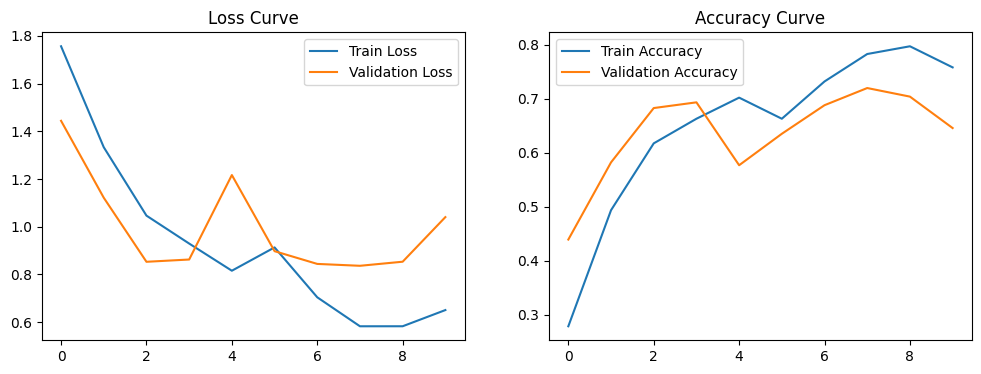

In [13]:
def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    # Loss plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history["loss"], label="Train Loss")
    plt.plot(history.history["val_loss"], label="Validation Loss")
    plt.legend()
    plt.title("Loss Curve")

    # Accuracy plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history["accuracy"], label="Train Accuracy")
    plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
    plt.legend()
    plt.title("Accuracy Curve")

    plt.show()

plot_training_history(history)


In [16]:
def visualize_feature_maps(img_path, model, layer_index=1):
    from tensorflow.keras.preprocessing import image

    img = image.load_img(img_path, target_size=IMG_SIZE)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Create a new model that outputs feature maps from a chosen layer
    feature_model = tf.keras.models.Model(inputs=model.input, outputs=model.layers[layer_index].output)
    feature_maps = feature_model.predict(img_array)

    # Plot feature maps
    fig, axes = plt.subplots(4, 8, figsize=(12, 8))
    axes = axes.flatten()

    for i in range(min(32, feature_maps.shape[-1])):  # Display up to 32 filters
        axes[i].imshow(feature_maps[0, :, :, i], cmap="viridis")
        axes[i].axis("off")

    plt.suptitle(f"Feature Maps from Layer {layer_index}")
    plt.show()
